In [41]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

DATAPATH = "../data"
FIGUREPATH = "../figures"

In [43]:
# Step 2: Load the datasets
# Construct file paths
dataset_filepath = os.path.join(DATAPATH, 'Total_dataset.csv')
train_with_descriptors_filepath = os.path.join(DATAPATH, 'train_finprt_with_qed.csv')
test_with_descriptors_filepath = os.path.join(DATAPATH, 'test_finprt_with_qed.csv')


# Load dataset
dataset = pd.read_csv(dataset_filepath)
train =pd.read_csv(train_with_descriptors_filepath)
test=pd.read_csv(test_with_descriptors_filepath)

In [44]:
dataset.head()

,smiles,toxicity,ref
0,CC1=NN=C(O1)C(=O)NC(C)(C)C2=N/C(=C(/NCC3=CC=C(...,1,DILIrank
1,C1=CC2=C(C=C1OC(F)(F)F)SC(=N2)N,1,DILIrank
2,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,1,DILIrank
3,CC(C1=CC(=CC=C1)OC2=CC=CC=C2)C(=O)O,1,DILIrank
4,CC(=O)NC1=NN=C(S1)S(=O)(=O)N,1,DILIrank


In [45]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,211.217,0.44230,5,4,103.78,3,1,1,1
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,357.793,3.92732,4,1,68.53,5,3,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,273.741,1.61550,3,0,54.45,1,1,0,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,414.527,3.36850,6,0,59.08,6,2,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,268.273,-0.98900,6,4,112.13,2,1,0,1


In [46]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,444.423,0.98202,8,3,150.02,6,2,3,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,234.202,2.77710,3,1,48.14,1,2,0,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1202.635,3.26900,12,5,278.80,15,0,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,242.274,3.66700,3,1,46.53,4,2,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,222.251,-0.85610,5,2,115.04,2,1,1,1


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       268
           1       0.85      0.94      0.89       184

    accuracy                           0.91       452
   macro avg       0.90      0.91      0.91       452
weighted avg       0.91      0.91      0.91       452



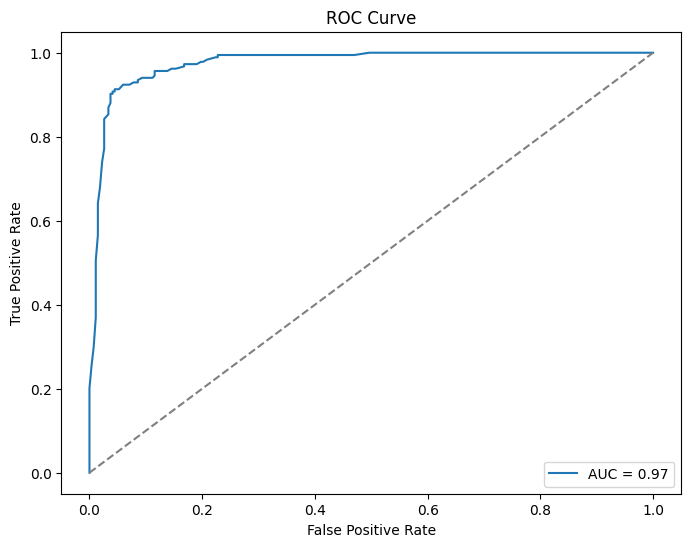

['../../checkpoints/Random_forest_model.pkl']

In [48]:
## Random forest classifier model
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Split features and target variable
X_train = train.drop(columns=['toxicity'])
y_train = train['toxicity']
X_test = test.drop(columns=['toxicity'])
y_test = test['toxicity']

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Curve
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Save the trained model to a file
joblib.dump(rf_classifier, '../../checkpoints/Random_forest_model.pkl')